In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_iris()
D = pd.DataFrame(data.data)
T = data.target

D.columns = data.feature_names

In [3]:
D.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
def dis(c, x):
    return sum(np.square(c-x))

def classify(D, c):
    classLabel = np.zeros((D.shape[0], 1))
    for i in range(D.shape[0]):
        classLabel[i] = np.argmin([dis(c[j], D.iloc[i, :]) for j in range(len(c))])
    return np.array(classLabel)

def k_means(D, k):
    x = np.random.randint(D.shape[0], size = (1, 3))[0]
    c = [D.iloc[x[i], :] for i in range(x.shape[0])]
    pre_class = np.zeros((D.shape[0], 1))
    post_class = np.ones((D.shape[0], 1))
    while (pre_class != post_class).all():
        pre_class = post_class
        post_class = classify(D, c)
        # update central point
        for i in range(len(c)):
            c[i] = np.mean(D[post_class == i], axis = 0)
    return c

In [5]:
x = np.random.randint(D.shape[0], size = (1, 3))[0]
c = [D.iloc[x[i], :] for i in range(x.shape[0])]
c = k_means(D, 3)
result = classify(D, c)

In [6]:
result

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [7]:
transform = {0:0, 1:1, 2:2}
temp = np.array([transform[result[i][0]] == T[i] for i in range(T.shape[0])])
print("precision is :{}".format(np.where(temp == True)[0].shape[0]/T.shape[0]))

precision is :0.32666666666666666


## learning vector quantization

In [8]:
import random
def LVQ(D, T):
    p = np.zeros((D.shape[1], 3))
    for i in range(p.shape[1]):
        p[:, i] = D.iloc[np.where(T == i)[0][0], :]
    lamda = 0.01
    for i in range(D.shape[0]):
#     for z in range(5000):
#         i = random.randint(a = 0, b = D.shape[0] -1)
        idx = np.argmin([dis(p[:, i], D.iloc[i, :]) for i in range(p.shape[1])])
#         print([dis(p[:, i], D.iloc[i, :]) for i in range(p.shape[1])])
#         print(idx)
#         print(p)
#         print(D.iloc[i, :])
#         print(dis(p[:, 0], D.iloc[i, :]))
#         print(dis(p[:, 1], D.iloc[i, :]))
#         print(dis(p[:, 2], D.iloc[i, :]))
#         asda
        # update p
        if(idx == T[i]):
            p[:, idx] = p[:, idx] + lamda * (D.iloc[i, :] - p[:, idx])
        else:
            p[:, idx] = p[:, idx] - lamda * (D.iloc[i, :] - p[:, idx])
    return p
        
        
p = LVQ(D, T)
result = classify(D, p.transpose())
result

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [9]:
# Gussian mixure model

In [10]:
x1 = np.random.normal(10, 1, 50)
y1 = np.random.normal(3, 1, 50)

x2 = np.random.normal(15, 1, 50)
y2 = np.random.normal(4, 1, 50)

xx = np.concatenate((x1, x2))
yy = np.concatenate((y1, y2))

X = np.stack((xx, yy), axis = 1)

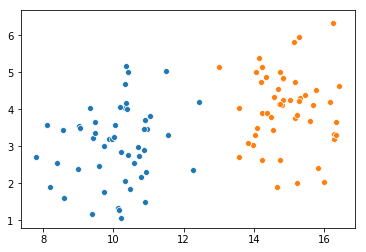

In [11]:
import seaborn as sns

sns.scatterplot(x1, y1)
sns.scatterplot(x2, y2)

us:[array([12.94308138,  3.69426455]), array([11.17105006,  3.02844475])]

 covs:[matrix([[6.04362044, 1.73888869],
        [1.73888869, 1.43773413]]), matrix([[ 6.21984262, -1.04948649],
        [-1.04948649,  0.31497155]])]

 alphas:[0.7510846329224969, 0.2489153670775032]




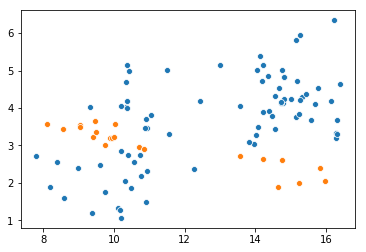

us:[array([12.61309729,  3.59740433]), array([11.53179832,  2.9271013 ])]

 covs:[matrix([[6.47627852, 1.49710702],
        [1.49710702, 1.30030483]]), matrix([[ 7.35684624, -1.40830502],
        [-1.40830502,  0.32136199]])]

 alphas:[0.897251603304804, 0.1027483966951961]




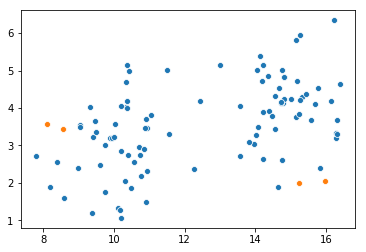

us:[array([12.61895903,  3.58704606]), array([11.34032077,  2.94737112])]

 covs:[matrix([[6.45507626, 1.46140632],
        [1.46140632, 1.29701715]]), matrix([[ 7.36894591, -1.42441206],
        [-1.42441206,  0.31444008]])]

 alphas:[0.9085249660641901, 0.09147503393581013]




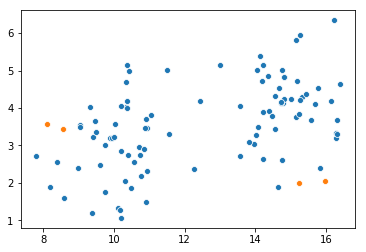

us:[array([12.64062678,  3.58086771]), array([11.05640575,  2.98279395])]

 covs:[matrix([[6.43514207, 1.43593069],
        [1.43593069, 1.29942172]]), matrix([[ 6.88081903, -1.37738734],
        [-1.37738734,  0.30703428]])]

 alphas:[0.912492496114233, 0.087507503885767]




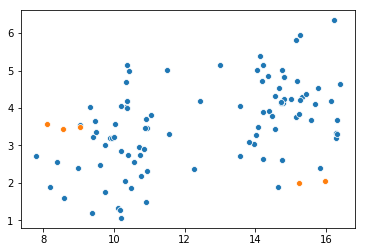

us:[array([12.73862875,  3.5555561 ]), array([9.78314357, 3.21802947])]

 covs:[matrix([[6.36673024, 1.33969926],
        [1.33969926, 1.32899835]]), matrix([[ 2.17574038, -0.5059566 ],
        [-0.5059566 ,  0.12689428]])]

 alphas:[0.9199342312576465, 0.08006576874235356]




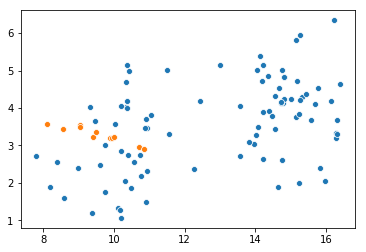

In [12]:
def guassian(x, mean, cov):
    dim = mean.shape[0]
    # cov的行列式为零时的措施
    covdet = np.linalg.det(cov + np.eye(dim) * 0.001)
    covinv = np.linalg.inv(cov + np.eye(dim) * 0.001)
    xdiff = (x - mean).reshape((1,dim))
    # 概率密度
    prob = 1.0/(np.power(np.power(2*np.pi,dim)*np.abs(covdet),0.5))*\
           np.exp(-0.5*xdiff.dot(covinv).dot(xdiff.T))[0][0]
    return prob

def postProbability(x, alpha, us, covs):
    dim = len(us)
    p_sum = 0
    for i in range(dim):
        p_sum = p_sum + alpha[i] * guassian(x, us[i], covs[i])
    ret = []
    
    for i in range(dim):
        ret.append(alpha[i] * guassian(x, us[i], covs[i]) / p_sum)
    return ret

def EStep(X, us, covs, alpha):
    dim = X.shape[0]
    label = [0] * dim
    ret = np.zeros((dim, len(us)))
    for i in range(dim):
        lps = postProbability(X[i, :], alpha, us, covs)
        label[i] = np.argmax(lps)
        ret[i, :] = lps
    return ret

def MStep(X, postP, K):
    us = [[0] * X.shape[1]] * K
    covs = [np.zeros((X.shape[1], X.shape[1]))] * K
    alphas = [0] * K
    for i in range(K):
        # update means
        us[i] = np.dot(X.transpose(), postP[:, i]) / np.sum(postP[:, i])
        
        # update covariance
        tempSum = np.zeros((X.shape[1], X.shape[1]))
        for j in range(X.shape[0]):
            tempSum = tempSum + postP[j, i] * np.dot(np.mat(X[j, :] - us[i]).transpose(), np.mat(X[j, :] - us[i]))
        covs[i] = tempSum/np.sum([postP[:, i]])
        
        # update weights
        alphas[i] = np.sum([postP[:, i]]) / X.shape[0]
    return us, covs, alphas
        
        
def visualize(X, us, covs, alphas, K = 2):
    dim = X.shape[0]
    label = [0] * dim
    for i in range(dim):
        lps = postProbability(X[i, :], alphas, us, covs)
        label[i] = np.argmax(lps)
    
    C = []
    for i in range(K):
        C.append(np.where(np.array(label) == i)[0])
    
    plt.figure()
    for i in range(K):
        sns.scatterplot(X[C[i], 0], X[C[i], 1])
    plt.show()
            
        
def GMM(X, K):
    idxs = np.random.choice(range(X.shape[0]), size = K)
    us = [X[idxs[i],:] for i in range(K)]
    alphas = [1/K for i in range(K)]   
    covs = []
    for i in range(K):
        cov = np.random.randn(K, K)
        cov = cov + cov.transpose()
        covs.append(cov)
    
    for i in range(50):
        # E step
        postP = EStep(X, us, covs, alphas)
        
        # M step
        us, covs, alphas = MStep(X, postP, K)
        
        if i % 10 == 0:
            print("us:{}\n\n covs:{}\n\n alphas:{}\n\n".format(us, covs, alphas))
            visualize(X, us, covs, alphas, K)
    return us, covs, alphas
        
u, c, a = GMM(X, 2)

D:\download\Programming_language\python\Ana\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


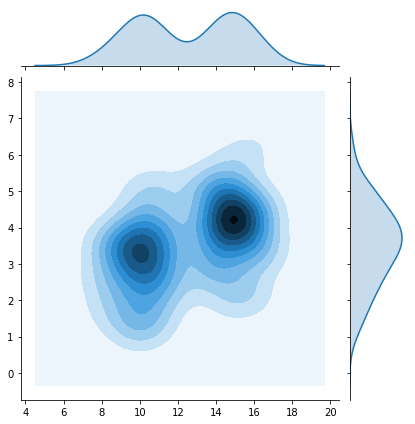

In [13]:
sns.jointplot(x = xx, y = yy, kind = "kde")

## DBSCAN

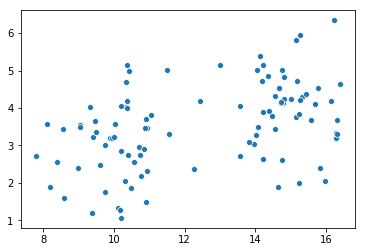

In [14]:
sns.scatterplot(X[:, 0], X[:, 1])

In [ ]:
def neighbors(x, X, r):
    dist = np.sqrt(np.sum(np.square(X-x), axis = 1))
    n = np.where(dist < r)[0]
    return set(n)

def DBSCAN(X, r, MinPts):
    C = set()
    # find all cluster central
    for i in range(X.shape[0]):
        n = neighbors(X[i, :], X, r)
        if(len(n) > MinPts):
            C.add(i)
    print(C)
    
    clusters = []
    curX = list(range(X.shape[0]))
    while len(curX) > 0:
        # select one central from set
        c = C.pop()
        print('select:', c)
        centers = {c}
        cluster = []
        while len(centers) != 0:
            currentCenter = centers.pop()
            n = neighbors(X[currentCenter, :], X[curX, :], r)
            
            cluster.extend(n)
            for cc in C:
                if cc != c and (cc in n):
                    centers.add(cc)
        
            print('cluster:', cluster)
            print(centers)
            asdfa
        clusters.append(cluster)
        asfda

DBSCAN(X, 1, 10)